In [2]:
import pandas as pd

df = pd.read_excel('/home/ubuntu/cur/isep/result2.2.xlsx', sheet_name='Sheet1')
df.head()

,Unnamed: 0,*CLAUSE_EXPLANATION,*CLAUSE_POSITIVE_PERMISSION_CONSENT,*CLAUSE_PENALTY_Lv2,*CLAUSE_PENALTY_Lv1,*CLAUSE_RESTRICTED_ZONE,*CLAUSE_ZONE_Lv1,*CLAUSE_ZONE_Lv2,*CLAUSE_ENVIRONMENT,*CLAUSE_DOC_REQUIREMENTS,...,*MODAL_MUST,*MODAL_SHOULD,*PROCEDURE_NOTICE_MUNICIPARITY,*PROCEDURE_CONSULTAION,*PROCEDURE_NOTICE_OPERATOR,*PROCEDURE_TIMING,*STAKEHOLDER_RESIDENTS,*CLAUSE_STAKEHOLDER_CONFIRMATION,*GEO_REFERENCES,ケース数
0,かつらぎ町,0 (0.00%),0 (0.00%),0 (0.00%),12 (12.24%),0 (0.00%),0 (0.00%),0 (0.00%),4 (4.08%),0 (0.00%),...,14 (14.29%),2 (2.04%),2 (2.04%),10 (10.20%),26 (26.53%),6 (6.12%),10 (10.20%),0 (0.00%),0 (0.00%),98
1,伊達市,8 (6.20%),7 (5.43%),0 (0.00%),11 (8.53%),0 (0.00%),7 (5.43%),0 (0.00%),11 (8.53%),4 (3.10%),...,7 (5.43%),5 (3.88%),8 (6.20%),3 (2.33%),42 (32.56%),3 (2.33%),11 (8.53%),1 (0.78%),0 (0.00%),129
2,宇都宮市,11 (5.14%),8 (3.74%),0 (0.00%),11 (5.14%),4 (1.87%),8 (3.74%),0 (0.00%),25 (11.68%),10 (4.67%),...,17 (7.94%),4 (1.87%),14 (6.54%),18 (8.41%),45 (21.03%),12 (5.61%),15 (7.01%),3 (1.40%),5 (2.34%),214
3,皆野町,11 (5.95%),4 (2.16%),0 (0.00%),20 (10.81%),0 (0.00%),1 (0.54%),0 (0.00%),8 (4.32%),3 (1.62%),...,16 (8.65%),7 (3.78%),12 (6.49%),11 (5.95%),48 (25.95%),8 (4.32%),14 (7.57%),2 (1.08%),0 (0.00%),185
4,角田市,7 (6.14%),5 (4.39%),0 (0.00%),10 (8.77%),1 (0.88%),4 (3.51%),0 (0.00%),12 (10.53%),4 (3.51%),...,14 (12.28%),6 (5.26%),11 (9.65%),16 (14.04%),23 (20.18%),3 (2.63%),14 (12.28%),1 (0.88%),2 (1.75%),114


In [8]:
import re

# 個数とパーセンテージを分離する関数
def split_count_and_ratio(value):
    if pd.isna(value):
        return 0, 0.0
    
    # 文字列として処理
    value_str = str(value)
    
    # パターン: "個数 (パーセント%)"
    match = re.match(r'(\d+)\s*\((\d+\.?\d*)%\)', value_str)
    if match:
        count = int(match.group(1))
        ratio = float(match.group(2))
        return count, ratio
    else:
        # パースできない場合は元の値を返す
        return value, 0.0

# 'Unnamed: 0'と'ケース数'以外の列を処理
columns_to_process = [col for col in df.columns if col not in ['Unnamed: 0', 'ケース数']]

# 新しいデータフレームを作成
new_df = df[['Unnamed: 0']].copy()

for col in columns_to_process:
    # 個数とパーセンテージを分離
    counts, ratios = zip(*df[col].apply(split_count_and_ratio))
    
    # 個数の列
    new_df[col] = counts
    
    # パーセンテージの列(ratio)
    new_df[f'{col}_ratio(%)'] = ratios

# 最後に'ケース数'を追加
new_df['ケース数'] = df['ケース数']

# 結果を確認

new_df.to_csv("result2.2.csv")
new_df.head()

,Unnamed: 0,*CLAUSE_EXPLANATION,*CLAUSE_EXPLANATION_ratio(%),*CLAUSE_POSITIVE_PERMISSION_CONSENT,*CLAUSE_POSITIVE_PERMISSION_CONSENT_ratio(%),*CLAUSE_PENALTY_Lv2,*CLAUSE_PENALTY_Lv2_ratio(%),*CLAUSE_PENALTY_Lv1,*CLAUSE_PENALTY_Lv1_ratio(%),*CLAUSE_RESTRICTED_ZONE,...,*PROCEDURE_NOTICE_OPERATOR_ratio(%),*PROCEDURE_TIMING,*PROCEDURE_TIMING_ratio(%),*STAKEHOLDER_RESIDENTS,*STAKEHOLDER_RESIDENTS_ratio(%),*CLAUSE_STAKEHOLDER_CONFIRMATION,*CLAUSE_STAKEHOLDER_CONFIRMATION_ratio(%),*GEO_REFERENCES,*GEO_REFERENCES_ratio(%),ケース数
0,かつらぎ町,0.0,0.00,0,0.00,0,0.0,12.0,12.24,0.0,...,26.53,6,6.12,10,10.20,0,0.00,0,0.00,98
1,伊達市,8.0,6.20,7,5.43,0,0.0,11.0,8.53,0.0,...,32.56,3,2.33,11,8.53,1,0.78,0,0.00,129
2,宇都宮市,11.0,5.14,8,3.74,0,0.0,11.0,5.14,4.0,...,21.03,12,5.61,15,7.01,3,1.40,5,2.34,214
3,皆野町,11.0,5.95,4,2.16,0,0.0,20.0,10.81,0.0,...,25.95,8,4.32,14,7.57,2,1.08,0,0.00,185
4,角田市,7.0,6.14,5,4.39,0,0.0,10.0,8.77,1.0,...,20.18,3,2.63,14,12.28,1,0.88,2,1.75,114


# ピアソン残差の計算と分析

## 1. データの前処理

合計行とカイ2乗値行を除外し、ピアソン残差を計算します。

In [11]:
import numpy as np
from scipy.stats import chi2_contingency

# 合計行とカイ2乗値行を除外(最後の2行)
df_analysis = new_df.iloc[:-2].copy()

# 数値列を数値型に変換(自治体名以外)
numeric_columns = [col for col in df_analysis.columns if col != 'Unnamed: 0']
for col in numeric_columns:
    df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce').fillna(0)

# カウント列は整数型に(比率列以外)
count_columns = [col for col in numeric_columns if '_ratio(%)' not in col and col != 'ケース数']
for col in count_columns:
    df_analysis[col] = df_analysis[col].astype(int)

# ケース数も整数型に
df_analysis['ケース数'] = df_analysis['ケース数'].astype(int)

# 自治体名列を確認
print("分析対象自治体数:", len(df_analysis))
print("\n最初の5自治体:")
print(df_analysis['Unnamed: 0'].head())

# データ型を確認
print("\nデータ型(最初の10列):")
print(df_analysis.dtypes.head(10))

分析対象自治体数: 53

最初の5自治体:
0    かつらぎ町
1      伊達市
2     宇都宮市
3      皆野町
4      角田市
Name: Unnamed: 0, dtype: object

データ型(最初の10列):
Unnamed: 0                                       object
*CLAUSE_EXPLANATION                               int64
*CLAUSE_EXPLANATION_ratio(%)                    float64
*CLAUSE_POSITIVE_PERMISSION_CONSENT               int64
*CLAUSE_POSITIVE_PERMISSION_CONSENT_ratio(%)    float64
*CLAUSE_PENALTY_Lv2                               int64
*CLAUSE_PENALTY_Lv2_ratio(%)                    float64
*CLAUSE_PENALTY_Lv1                               int64
*CLAUSE_PENALTY_Lv1_ratio(%)                    float64
*CLAUSE_RESTRICTED_ZONE                           int64
dtype: object


In [12]:
# ピアソン残差を計算する関数
def calculate_pearson_residuals(df_data):
    """
    各コーディング項目についてピアソン残差を計算
    
    Parameters:
    -----------
    df_data : DataFrame
        自治体×コーディング項目のカウントデータ
    
    Returns:
    --------
    df_with_residuals : DataFrame
        ピアソン残差列を追加したデータフレーム
    """
    # 結果を格納するデータフレーム
    df_result = df_data.copy()
    
    # カウント列のみを抽出(比率列とケース数は除外)
    count_columns = [col for col in df_data.columns 
                     if col not in ['Unnamed: 0', 'ケース数'] 
                     and '_ratio(%)' not in col]
    
    # 各カウント列についてピアソン残差を計算
    for col in count_columns:
        # クロス集計表を作成(自治体 × 当該コーディングの有無)
        # 各自治体の当該コーディング出現回数と非出現回数
        present = df_data[col].values
        total_cases = df_data['ケース数'].values
        absent = total_cases - present
        
        # クロス集計表
        contingency_table = np.column_stack([present, absent])
        
        # カイ2乗検定
        try:
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            
            # ピアソン残差を計算: (観測度数 - 期待度数) / sqrt(期待度数)
            pearson_resid = (present - expected[:, 0]) / np.sqrt(expected[:, 0])
            
            # 残差列を追加
            df_result[f'{col}_pearson_resid'] = pearson_resid
            
        except Exception as e:
            print(f"警告: {col} の計算中にエラー: {e}")
            df_result[f'{col}_pearson_resid'] = 0.0
    
    return df_result

# ピアソン残差を計算
print("ピアソン残差を計算中...")
df_with_residuals = calculate_pearson_residuals(df_analysis)

print(f"\n計算完了。列数: {len(df_with_residuals.columns)}")
print("\n追加された残差列の例:")
residual_cols = [col for col in df_with_residuals.columns if 'pearson_resid' in col]
print(residual_cols[:5])

ピアソン残差を計算中...

計算完了。列数: 77

追加された残差列の例:
['*CLAUSE_EXPLANATION_pearson_resid', '*CLAUSE_POSITIVE_PERMISSION_CONSENT_pearson_resid', '*CLAUSE_PENALTY_Lv2_pearson_resid', '*CLAUSE_PENALTY_Lv1_pearson_resid', '*CLAUSE_RESTRICTED_ZONE_pearson_resid']


In [13]:
# 自治体名列をわかりやすい名前に変更
df_with_residuals = df_with_residuals.rename(columns={'Unnamed: 0': 'Municiparity_name'})

# 結果を確認
print("データの形状:", df_with_residuals.shape)
print("\n最初の3自治体のデータ(抜粋):")
display_cols = ['Municiparity_name', 
                '*CLAUSE_POSITIVE_PERMISSION_CONSENT',
                '*CLAUSE_POSITIVE_PERMISSION_CONSENT_pearson_resid',
                '*CLAUSE_ZONE_Lv1',
                '*CLAUSE_ZONE_Lv1_pearson_resid',
                '*CLAUSE_ZONE_Lv2',
                '*CLAUSE_ZONE_Lv2_pearson_resid',
                'ケース数']

df_with_residuals[display_cols].head(3)

データの形状: (53, 77)

最初の3自治体のデータ(抜粋):


,Municiparity_name,*CLAUSE_POSITIVE_PERMISSION_CONSENT,*CLAUSE_POSITIVE_PERMISSION_CONSENT_pearson_resid,*CLAUSE_ZONE_Lv1,*CLAUSE_ZONE_Lv1_pearson_resid,*CLAUSE_ZONE_Lv2,*CLAUSE_ZONE_Lv2_pearson_resid,ケース数
0,かつらぎ町,0,-1.377201,0,-1.667588,0,-1.176135,98
1,伊達市,7,2.850075,7,1.745461,0,-1.349395,129
2,宇都宮市,8,1.895837,8,0.782202,0,-1.738006,214


In [14]:
# ピアソン残差の統計情報
residual_cols = [col for col in df_with_residuals.columns if 'pearson_resid' in col]

print("ピアソン残差の統計情報:")
print(df_with_residuals[residual_cols].describe())

# 顕著な正の残差(>1.0)を持つ項目を確認
print("\n\n顕著な正の残差(>1.0)を持つケース数:")
for col in residual_cols:
    count = (df_with_residuals[col] > 1.0).sum()
    if count > 0:
        print(f"{col}: {count}件")

ピアソン残差の統計情報:
       *CLAUSE_EXPLANATION_pearson_resid  \
count                          53.000000   
mean                            0.023388   
std                             1.083633   
min                            -2.832372   
25%                            -0.467615   
50%                             0.232758   
75%                             0.662964   
max                             2.421487   

       *CLAUSE_POSITIVE_PERMISSION_CONSENT_pearson_resid  \
count                                          53.000000   
mean                                           -0.122870   
std                                             1.773977   
min                                            -1.932693   
25%                                            -1.472290   
50%                                            -1.241571   
75%                                             1.154813   
max                                             4.297421   

       *CLAUSE_PENALTY_Lv2_pearson_resid  *CLAUSE

In [15]:
# CSVファイルとして保存(ピアソン残差込み)
output_path = '/home/ubuntu/cur/isep/result_solar_rule_gof_tests.csv'
df_with_residuals.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"ピアソン残差を含むデータを保存しました: {output_path}")

ピアソン残差を含むデータを保存しました: /home/ubuntu/cur/isep/result_solar_rule_gof_tests.csv


## 2. 許可制 vs 届出制の判定

`CLAUSE_POSITIVE_PERMISSION_CONSENT`(許可・承認)と`PROCEDURE_NOTICE_OPERATOR`(届出)の出現頻度とPearson残差を組み合わせて、各自治体の規制タイプを判定します。

**判定基準:**
- **Pearson残差を考慮**: 残差が正(+1.0以上)の場合、その条項が自治体で特徴的に重視されていると判断
- **許可制優位**: 
  - 許可のPearson残差 > 1.0、または
  - 許可 > 0 かつ (届出 = 0 または 許可/届出 ≥ 0.5)
- **届出制優位**: 
  - 届出のPearson残差 > 1.0 かつ 許可のPearson残差 < 1.0、または
  - 許可 = 0 かつ 届出 > 0
- **混合型**: 上記以外

In [16]:
def classify_regulation_type(row):
    """許可制・届出制の分類関数
    
    法律文書では「許可」という文言は慎重に使用されるため、
    出現回数とPearson残差を組み合わせて判定する。
    """
    permission = row['*CLAUSE_POSITIVE_PERMISSION_CONSENT']
    notice = row['*PROCEDURE_NOTICE_OPERATOR']
    permission_resid = row['*CLAUSE_POSITIVE_PERMISSION_CONSENT_pearson_resid']
    notice_resid = row['*PROCEDURE_NOTICE_OPERATOR_pearson_resid']
    
    # 両方とも0の場合
    if notice == 0 and permission == 0:
        return '規定なし'
    
    # Pearson残差が大きい(+1.0以上)場合、その条項が特徴的に重視されている
    # 許可のPearson残差が顕著に正の場合、許可制優位
    if permission_resid > 1.0:
        return '許可制優位'
    
    # 届出のPearson残差が顕著に正で、許可が特徴的でない場合、届出制優位
    if notice_resid > 1.0 and permission_resid < 1.0:
        return '届出制優位'
    
    # Pearson残差が決定的でない場合、カウント数で判定
    if permission > 0:
        if notice == 0:
            return '許可制優位'
        ratio = permission / notice
        # 許可が届出の半分以上あれば、許可制の意図があると判断
        if ratio >= 0.5:
            return '許可制優位'
        else:
            return '混合型'
    else:
        # 許可が0で届出のみの場合
        return '届出制優位'

# 分類の適用
df_with_residuals['規制タイプ'] = df_with_residuals.apply(classify_regulation_type, axis=1)

# 結果の表示
regulation_summary = df_with_residuals[['Municiparity_name', 
                                '*CLAUSE_POSITIVE_PERMISSION_CONSENT',
                                '*CLAUSE_POSITIVE_PERMISSION_CONSENT_pearson_resid',
                                '*PROCEDURE_NOTICE_OPERATOR',
                                '*PROCEDURE_NOTICE_OPERATOR_pearson_resid',
                                '規制タイプ']].copy()
regulation_summary.columns = ['自治体', '許可関連', '許可(残差)', '届出関連', '届出(残差)', '規制タイプ']
# 残差を小数点第2位まで表示
regulation_summary['許可(残差)'] = regulation_summary['許可(残差)'].round(2)
regulation_summary['届出(残差)'] = regulation_summary['届出(残差)'].round(2)
print(regulation_summary.to_string(index=False))

print("\n\n規制タイプの分布:")
print(df_with_residuals['規制タイプ'].value_counts())

  自治体  許可関連  許可(残差)  届出関連  届出(残差) 規制タイプ
かつらぎ町     0   -1.38    26    0.39 届出制優位
  伊達市     7    2.85    42    1.83 許可制優位
 宇都宮市     8    1.90    45   -1.04 許可制優位
  皆野町     4    0.22    48    0.38   混合型
  角田市     5    1.88    23   -0.95 許可制優位
  嬉野市     0   -1.93    52    0.67 届出制優位
  鬼北町     5    2.01    14   -2.43 許可制優位
  菊川市     2    0.09    24    0.04   混合型
  吉賀町     2   -0.15    16   -2.30   混合型
 京田辺市    12    4.30    37   -1.48 許可制優位
  玉川村     3    0.71    32    1.33 届出制優位
   錦町     0   -1.51    36    1.30 届出制優位
  釧路市     7    1.92    50    0.95 許可制優位
  五條市     0   -1.38    19   -1.08 届出制優位
  江差町     0   -1.47    35    1.43 届出制優位
  高槻市     0   -1.42    29    0.68 届出制優位
  国見町     5    1.95    29    0.33 許可制優位
  今金町     2    0.35    20    0.02   混合型
 佐久穂町     2   -0.44    31   -0.62   混合型
  桜井市     0   -1.42    19   -1.30 届出制優位
  士別市     0   -1.74    56    2.86 届出制優位
  市川町     0   -1.28    34    2.87 届出制優位
  松江市     3   -0.13    43    0.31   混合型
常陸大宮市    12    4.21    52    0.56 許可制優位


## 3. 区域設定の類型化

`CLAUSE_ZONE_Lv1`(抑制区域)と`CLAUSE_ZONE_Lv2`(禁止区域)の設定状況とPearson残差を組み合わせて、区域規制の類型を判定します。

**判定基準:**
- **Pearson残差を考慮**: 残差が正(+1.0以上)の場合、その区域設定が自治体で特徴的に重視されていると判断
- **禁止地区制**: 
  - 禁止区域のPearson残差 > 1.0、または
  - Lv2 > 0 かつ Lv1 < Lv2 × 2
- **抑制地区制**: 
  - 抑制区域のPearson残差 > 1.0 かつ 禁止区域のPearson残差 < 1.0、または
  - Lv2 = 0 かつ Lv1 ≥ 3
- **2層構造**: Lv1 ≥ 3 かつ Lv2 ≥ 3

In [28]:
# 禁止区域の程度を数値化する指標を追加
# 禁止区域比率 = Lv2 / (Lv1 + Lv2)
df_with_residuals['禁止区域比率'] = (
    df_with_residuals['*CLAUSE_ZONE_Lv2'] / 
    (df_with_residuals['*CLAUSE_ZONE_Lv1'] + df_with_residuals['*CLAUSE_ZONE_Lv2'])
).fillna(0)

# 正規化された禁止区域の強度(ケース数あたり)
df_with_residuals['禁止区域強度(正規化)'] = (
    df_with_residuals['*CLAUSE_ZONE_Lv2'] / df_with_residuals['ケース数'] * 100
)

print("禁止区域の程度を示す指標を追加しました:")
print("\n禁止区域比率の統計:")
print(df_with_residuals['禁止区域比率'].describe())
print("\n禁止区域強度(正規化)の統計:")
print(df_with_residuals['禁止区域強度(正規化)'].describe())

禁止区域の程度を示す指標を追加しました:

禁止区域比率の統計:
count    53.000000
mean      0.315222
std       0.382197
min       0.000000
25%       0.000000
50%       0.142857
75%       0.562500
max       1.000000
Name: 禁止区域比率, dtype: float64

禁止区域強度(正規化)の統計:
count    53.000000
mean      1.305273
std       1.680688
min       0.000000
25%       0.000000
50%       0.684932
75%       2.083333
max       7.258065
Name: 禁止区域強度(正規化), dtype: float64


In [31]:
def classify_zone_type(row):
    """区域設定の類型化関数
    
    法律文書では「禁止」という文言は慎重に使用されるため、
    出現回数とPearson残差を組み合わせて判定する。
    
    【変更点】'2層構造(禁止+抑制)'と'抑制地区制(禁止区域含む)'を統合し、
    '2層構造(抑制+禁止)'として分類。禁止区域の程度は別途「禁止区域比率」で保持。
    """
    lv1 = row['*CLAUSE_ZONE_Lv1']  # 抑制区域
    lv2 = row['*CLAUSE_ZONE_Lv2']  # 禁止区域
    lv1_resid = row['*CLAUSE_ZONE_Lv1_pearson_resid']
    lv2_resid = row['*CLAUSE_ZONE_Lv2_pearson_resid']
    
    # 両方とも0の場合
    if lv1 == 0 and lv2 == 0:
        return '区域設定なし'
    
    # Pearson残差が大きい(+1.0以上)場合、その区域設定が特徴的に重視されている
    # 禁止区域のPearson残差が顕著に正の場合、禁止地区制
    if lv2_resid > 1.0:
        # ただし、両方が一定以上あれば2層構造
        if lv1 >= 3 and lv2 >= 3:
            return '2層構造(抑制+禁止)'
        else:
            return '禁止地区制'
    
    # 抑制区域のPearson残差が顕著に正で、禁止が特徴的でない場合
    if lv1_resid > 1.0 and lv2_resid < 1.0:
        # 禁止区域を含む場合も、統合して2層構造として扱う
        if lv2 > 0:
            return '2層構造(抑制+禁止)'
        else:
            return '抑制地区制'
    
    # Pearson残差が決定的でない場合、カウント数で判定
    if lv2 > 0:
        # 両方が一定以上(3以上)あれば2層構造
        if lv1 >= 3 and lv2 >= 3:
            return '2層構造(抑制+禁止)'
        # 抑制が禁止の2倍以上ある場合も、統合して2層構造として扱う
        elif lv1 >= lv2 * 2:
            return '2層構造(抑制+禁止)'
        else:
            return '禁止地区制'
    else:
        # 禁止区域が0で抑制区域のみの場合
        if lv1 >= 3:
            return '抑制地区制'
        else:
            return '区域設定あり(少数)'

# 分類の適用
df_with_residuals['区域類型'] = df_with_residuals.apply(classify_zone_type, axis=1)

# 結果の表示
zone_summary = df_with_residuals[['Municiparity_name', 
                         '*CLAUSE_ZONE_Lv1',
                         '*CLAUSE_ZONE_Lv1_pearson_resid',
                         '*CLAUSE_ZONE_Lv2',
                         '*CLAUSE_ZONE_Lv2_pearson_resid',
                         '*CLAUSE_RESTRICTED_ZONE',
                         '禁止区域比率',
                         '区域類型']].copy()
zone_summary.columns = ['自治体', '抑制区域(Lv1)', '抑制(残差)', '禁止区域(Lv2)', '禁止(残差)', '法定規制区域', '禁止区域比率', '区域類型']
# 残差と比率を小数点第2位まで表示
zone_summary['抑制(残差)'] = zone_summary['抑制(残差)'].round(2)
zone_summary['禁止(残差)'] = zone_summary['禁止(残差)'].round(2)
zone_summary['禁止区域比率'] = zone_summary['禁止区域比率'].round(2)
print(zone_summary.to_string(index=False))

print("\n\n区域類型の分布:")
print(df_with_residuals['区域類型'].value_counts())

print("\n\n【参考】2層構造における禁止区域比率の統計:")
two_layer = df_with_residuals[df_with_residuals['区域類型'] == '2層構造(抑制+禁止)']
if len(two_layer) > 0:
    print(f"平均: {two_layer['禁止区域比率'].mean():.2f}")
    print(f"中央値: {two_layer['禁止区域比率'].median():.2f}")
    print(f"最小値: {two_layer['禁止区域比率'].min():.2f}")
    print(f"最大値: {two_layer['禁止区域比率'].max():.2f}")

  自治体  抑制区域(Lv1)  抑制(残差)  禁止区域(Lv2)  禁止(残差)  法定規制区域  禁止区域比率        区域類型
かつらぎ町          0   -1.67          0   -1.18       0    0.00      区域設定なし
  伊達市          7    1.75          0   -1.35       0    0.00       抑制地区制
 宇都宮市          8    0.78          0   -1.74       4    0.00       抑制地区制
  皆野町          1   -1.85          0   -1.62       0    0.00  区域設定あり(少数)
  角田市          4    0.43          0   -1.27       1    0.00       抑制地区制
  嬉野市          5   -0.20          0   -1.65       0    0.00       抑制地区制
  鬼北町          0   -1.75          1   -0.42       0    1.00       禁止地区制
  菊川市          6    1.96          0   -1.17       1    0.00       抑制地区制
  吉賀町          0   -1.81          5    2.65       0    1.00       禁止地区制
 京田辺市          1   -1.91          4    0.78       1    0.80       禁止地区制
  玉川村          5    1.22          0   -1.21       0    0.00       抑制地区制
   錦町          0   -1.83          0   -1.29       0    0.00      区域設定なし
  釧路市          7    0.87          6    2.20       1    0.46 2層構造

In [27]:
# 禁止区域(Lv2)の実数値をリストとして出力
lv2_list = df_with_residuals['*CLAUSE_ZONE_Lv2'].tolist()
print("禁止区域(Lv2)の実数値リスト:")
print(lv2_list)

禁止区域(Lv2)の実数値リスト:
[0, 0, 0, 0, 0, 0, 1, 0, 5, 4, 0, 0, 6, 1, 0, 0, 0, 0, 2, 3, 3, 1, 4, 8, 6, 0, 3, 0, 1, 5, 1, 0, 4, 0, 3, 2, 4, 0, 4, 1, 0, 5, 0, 1, 0, 9, 0, 3, 0, 3, 4, 0, 0]


## 4. 条例の厳格度評価

モーダル表現(`MODAL_PROHIBIT`, `MODAL_MUST`, `MODAL_SHOULD`)から、条例の規制強度を評価します。

**厳格度スコア = 禁止表現 + 強い義務表現 - 努力義務表現**

スコアが高いほど厳格な条例と判断します。

In [37]:
# 厳格度スコアの計算
df_with_residuals['厳格度スコア'] = (df_with_residuals['*MODAL_PROHIBIT'] + 
                           df_with_residuals['*MODAL_MUST'] - 
                           df_with_residuals['*MODAL_SHOULD'])

# ケース数あたりに正規化
df_with_residuals['厳格度スコア(正規化)'] = df_with_residuals['厳格度スコア'] / df_with_residuals['ケース数'] * 100

# 【絶対評価】厳格度レベルの分類(固定閾値ベース)
def classify_strictness_absolute(score_normalized):
    """絶対的な厳格度を固定閾値で評価"""
    if score_normalized >= 5:
        return '非常に厳格'
    elif score_normalized >= 2:
        return '厳格'
    elif score_normalized >= 0:
        return '標準'
    else:
        return '緩やか'

df_with_residuals['厳格度レベル(絶対)'] = df_with_residuals['厳格度スコア(正規化)'].apply(classify_strictness_absolute)

# 【相対評価】厳格度レベルの分類(四分位数ベース)
def classify_strictness_relative(score_normalized, q1, q2, q3):
    """相対的な厳格度を四分位数で評価"""
    if score_normalized >= q3:
        return '非常に厳格'
    elif score_normalized >= q2:
        return '厳格'
    elif score_normalized >= q1:
        return '標準'
    else:
        return '緩やか'

# 四分位数を計算
q1 = df_with_residuals['厳格度スコア(正規化)'].quantile(0.25)
q2 = df_with_residuals['厳格度スコア(正規化)'].quantile(0.50)
q3 = df_with_residuals['厳格度スコア(正規化)'].quantile(0.75)

print(f"四分位数:")
print(f"  Q1(25%): {q1:.2f}")
print(f"  Q2(50%/中央値): {q2:.2f}")
print(f"  Q3(75%): {q3:.2f}")
print()

df_with_residuals['厳格度レベル(相対)'] = df_with_residuals['厳格度スコア(正規化)'].apply(
    lambda x: classify_strictness_relative(x, q1, q2, q3)
)

# 結果の表示
strictness_summary = df_with_residuals[['Municiparity_name', 
                               '*MODAL_PROHIBIT', 
                               '*MODAL_MUST', 
                               '*MODAL_SHOULD',
                               '厳格度スコア',
                               '厳格度スコア(正規化)',
                               '厳格度レベル(絶対)',
                               '厳格度レベル(相対)']].copy()
strictness_summary.columns = ['自治体', '禁止', '義務', '努力義務', 'スコア', 'スコア(正規化)', 'レベル(絶対)', 'レベル(相対)']
strictness_summary['スコア(正規化)'] = strictness_summary['スコア(正規化)'].round(2)
strictness_summary_sorted = strictness_summary.sort_values('スコア(正規化)', ascending=False)
print(strictness_summary_sorted.to_string(index=False))

print("\n\n【絶対評価】厳格度レベルの分布:")
print(df_with_residuals['厳格度レベル(絶対)'].value_counts().sort_index())

print("\n【相対評価】厳格度レベルの分布:")
print(df_with_residuals['厳格度レベル(相対)'].value_counts().sort_index())

# 両評価の比較
print("\n\n【比較】絶対評価 vs 相対評価のクロス集計:")
comparison = pd.crosstab(df_with_residuals['厳格度レベル(絶対)'], 
                         df_with_residuals['厳格度レベル(相対)'],
                         margins=True)
print(comparison)

四分位数:
  Q1(25%): 4.71
  Q2(50%/中央値): 7.69
  Q3(75%): 10.68

  自治体  禁止  義務  努力義務  スコア  スコア(正規化) レベル(絶対) レベル(相対)
 京田辺市   4  32     2   34     17.71   非常に厳格   非常に厳格
  湧別町   1  27     2   26     15.57   非常に厳格   非常に厳格
 佐久穂町   2  24     5   21     14.89   非常に厳格   非常に厳格
かつらぎ町   2  14     2   14     14.29   非常に厳格   非常に厳格
  砥部町   4  22     4   22     14.19   非常に厳格   非常に厳格
  那珂市   1  17     2   16     14.04   非常に厳格   非常に厳格
  大町市   2  25     3   24     13.79   非常に厳格   非常に厳格
  吉賀町   1  17     3   15     13.04   非常に厳格   非常に厳格
   錦町   0  22     7   15     12.71   非常に厳格   非常に厳格
  南砺市   2  20     3   19     11.80   非常に厳格   非常に厳格
  釧路市   4  19     3   20     11.24   非常に厳格   非常に厳格
 南箕輪村   2  19     8   13     11.11   非常に厳格   非常に厳格
  嬉野市   4  21     4   21     10.88   非常に厳格   非常に厳格
  福島市   4  27     6   25     10.68   非常に厳格   非常に厳格
  高槻市   0  12     1   11     10.58   非常に厳格      厳格
  今金町   1  10     3    8      9.88   非常に厳格      厳格
  美浜町   1  10     2    9      9.28   非常に厳格      厳格
  国見町   1  14     5   

## 5. 住民参加・手続き重視度の評価

住民関与や手続きに関する条項から、プロセス重視型かどうかを評価します。

**住民参加スコア = 説明会 + 意見聴取 + 住民関与**  
**手続きスコア = 協議 + 行政通知 + 届出**

In [19]:
# 住民参加スコアの計算
df_with_residuals['住民参加スコア'] = (df_with_residuals['*CLAUSE_EXPLANATION'] + 
                            df_with_residuals['*CLAUSE_HEARING'] + 
                            df_with_residuals['*STAKEHOLDER_RESIDENTS'])

# 手続きスコアの計算
df_with_residuals['手続きスコア'] = (df_with_residuals['*PROCEDURE_CONSULTAION'] + 
                          df_with_residuals['*PROCEDURE_NOTICE_MUNICIPARITY'] + 
                          df_with_residuals['*PROCEDURE_NOTICE_OPERATOR'])

# 正規化
df_with_residuals['住民参加スコア(正規化)'] = df_with_residuals['住民参加スコア'] / df_with_residuals['ケース数'] * 100
df_with_residuals['手続きスコア(正規化)'] = df_with_residuals['手続きスコア'] / df_with_residuals['ケース数'] * 100

# プロセス重視度の分類
def classify_process_orientation(row):
    resident = row['住民参加スコア(正規化)']
    procedure = row['手続きスコア(正規化)']
    
    if resident >= 10 and procedure >= 15:
        return '住民参加・手続き重視型'
    elif resident >= 10:
        return '住民参加重視型'
    elif procedure >= 15:
        return '手続き重視型'
    else:
        return '標準型'

df_with_residuals['プロセス重視度'] = df_with_residuals.apply(classify_process_orientation, axis=1)

# 結果の表示
process_summary = df_with_residuals[['Municiparity_name',
                           '住民参加スコア',
                           '住民参加スコア(正規化)',
                           '手続きスコア',
                           '手続きスコア(正規化)',
                           'プロセス重視度']].copy()
process_summary.columns = ['自治体', '住民参加', '住民参加(正規化)', '手続き', '手続き(正規化)', 'プロセス重視度']
process_summary['住民参加(正規化)'] = process_summary['住民参加(正規化)'].round(2)
process_summary['手続き(正規化)'] = process_summary['手続き(正規化)'].round(2)
process_summary_sorted = process_summary.sort_values('住民参加(正規化)', ascending=False)
print(process_summary_sorted.to_string(index=False))

print("\n\nプロセス重視度の分布:")
print(df_with_residuals['プロセス重視度'].value_counts())

  自治体  住民参加  住民参加(正規化)  手続き  手続き(正規化)     プロセス重視度
 南箕輪村    27      23.08   51     43.59 住民参加・手続き重視型
  今金町    18      22.22   32     39.51 住民参加・手続き重視型
   錦町    26      22.03   51     43.22 住民参加・手続き重視型
  美浜町    21      21.65   31     31.96 住民参加・手続き重視型
  吉賀町    23      20.00   36     31.30 住民参加・手続き重視型
  松江市    33      19.76   60     35.93 住民参加・手続き重視型
  湧別町    32      19.16   67     40.12 住民参加・手続き重視型
  砥部町    29      18.71   64     41.29 住民参加・手続き重視型
  角田市    21      18.42   50     43.86 住民参加・手続き重視型
  南砺市    29      18.01   41     25.47 住民参加・手続き重視型
  五條市    17      17.17   30     30.30 住民参加・手続き重視型
 佐久穂町    24      17.02   57     40.43 住民参加・手続き重視型
 東広島市    11      16.92   42     64.62 住民参加・手続き重視型
  桜井市    17      16.35   31     29.81 住民参加・手続き重視型
  伊達市    21      16.28   53     41.09 住民参加・手続き重視型
  豊橋市    15      15.79   40     42.11 住民参加・手続き重視型
  大空町    17      15.74   43     39.81 住民参加・手続き重視型
  大町市    27      15.52   66     37.93 住民参加・手続き重視型
  田村市    17      15.32   31     27.93 住民参加・手続き重視型


## 6. 総合的な分類結果の統合

これまでの4つの観点を統合し、各自治体の条例特性を一覧表示します。

In [38]:
# 総合結果の統合
comprehensive_result = df_with_residuals[['Municiparity_name',
                                 'ケース数',
                                 '規制タイプ',
                                 '区域類型',
                                 '禁止区域比率',
                                 '厳格度レベル(絶対)',
                                 '厳格度レベル(相対)',
                                 'プロセス重視度',
                                 '厳格度スコア(正規化)',
                                 '住民参加スコア(正規化)',
                                 '手続きスコア(正規化)']].copy()

comprehensive_result.columns = ['自治体', 'ケース数', '規制タイプ', '区域類型', 
                                '禁止区域比率', '厳格度(絶対)', '厳格度(相対)', 'プロセス重視度', 
                                '厳格度スコア(正規化)', '住民参加(正規化)', '手続き(正規化)']

# 数値を小数点第1位まで表示
for col in ['禁止区域比率', '厳格度スコア(正規化)', '住民参加(正規化)', '手続き(正規化)']:
    comprehensive_result[col] = comprehensive_result[col].round(1)

print("=" * 170)
print("太陽光発電規制条例の総合分類結果")
print("=" * 170)
print(comprehensive_result.to_string(index=False))

# 分類結果をCSVで保存
output_file = '/home/ubuntu/cur/isep/result_solar_rule_v1.1.csv'
comprehensive_result.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n\n分類結果を保存しました: {output_file}")

太陽光発電規制条例の総合分類結果
  自治体  ケース数 規制タイプ        区域類型  禁止区域比率 厳格度(絶対) 厳格度(相対)     プロセス重視度  厳格度スコア(正規化)  住民参加(正規化)  手続き(正規化)
かつらぎ町    98 届出制優位      区域設定なし     0.0   非常に厳格   非常に厳格 住民参加・手続き重視型         14.3       10.2      38.8
  伊達市   129 許可制優位       抑制地区制     0.0      厳格     緩やか 住民参加・手続き重視型          2.3       16.3      41.1
 宇都宮市   214 許可制優位       抑制地区制     0.0   非常に厳格      厳格 住民参加・手続き重視型          7.9       12.1      36.0
  皆野町   185   混合型  区域設定あり(少数)     0.0   非常に厳格      標準 住民参加・手続き重視型          5.4       13.5      38.4
  角田市   114 許可制優位       抑制地区制     0.0   非常に厳格      厳格 住民参加・手続き重視型          7.9       18.4      43.9
  嬉野市   193 届出制優位       抑制地区制     0.0   非常に厳格   非常に厳格 住民参加・手続き重視型         10.9       10.9      46.6
  鬼北町   108 許可制優位       禁止地区制     1.0   非常に厳格      標準 住民参加・手続き重視型          7.4       13.9      30.6
  菊川市    97   混合型       抑制地区制     0.0      厳格     緩やか      手続き重視型          3.1        5.2      29.9
  吉賀町   115   混合型       禁止地区制     1.0   非常に厳格   非常に厳格 住民参加・手続き重視型         13.0     

## 7. 可視化: クロス集計と散布図

分類結果を可視化し、自治体間の特徴を比較します。

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォント設定
plt.rcParams['font.sans-serif'] = ['M+ 1c']  # 適宜インストールされている日本語フォントに変更してください
plt.rcParams['axes.unicode_minus'] = False

# クロス集計: 規制タイプ × 区域類型
cross_tab1 = pd.crosstab(df_with_residuals['規制タイプ'], df_with_residuals['区域類型'])
print("規制タイプ × 区域類型のクロス集計:")
print(cross_tab1)
print("\n")

# クロス集計: 規制タイプ × 厳格度レベル
cross_tab2 = pd.crosstab(df_with_residuals['規制タイプ'], df_with_residuals['厳格度レベル'])
print("規制タイプ × 厳格度レベルのクロス集計:")
print(cross_tab2)
print("\n")

# クロス集計: 区域類型 × 厳格度レベル
cross_tab3 = pd.crosstab(df_with_residuals['区域類型'], df_with_residuals['厳格度レベル'])
print("区域類型 × 厳格度レベルのクロス集計:")
print(cross_tab3)

規制タイプ × 区域類型のクロス集計:
区域類型   2層構造(抑制+禁止)  区域設定あり(少数)  区域設定なし  抑制地区制  禁止地区制
規制タイプ                                               
届出制優位            9           0       7     10      5
混合型              0           1       0      2      3
許可制優位            6           0       1      4      5


規制タイプ × 厳格度レベルのクロス集計:
厳格度レベル  厳格  標準  緩やか  非常に厳格
規制タイプ                     
届出制優位    5   3    4     19
混合型      1   0    0      5
許可制優位    2   0    0     14


区域類型 × 厳格度レベルのクロス集計:
厳格度レベル       厳格  標準  緩やか  非常に厳格
区域類型                           
2層構造(抑制+禁止)   2   0    0     13
区域設定あり(少数)    0   0    0      1
区域設定なし        1   0    4      3
抑制地区制         5   2    0      9
禁止地区制         0   1    0     12


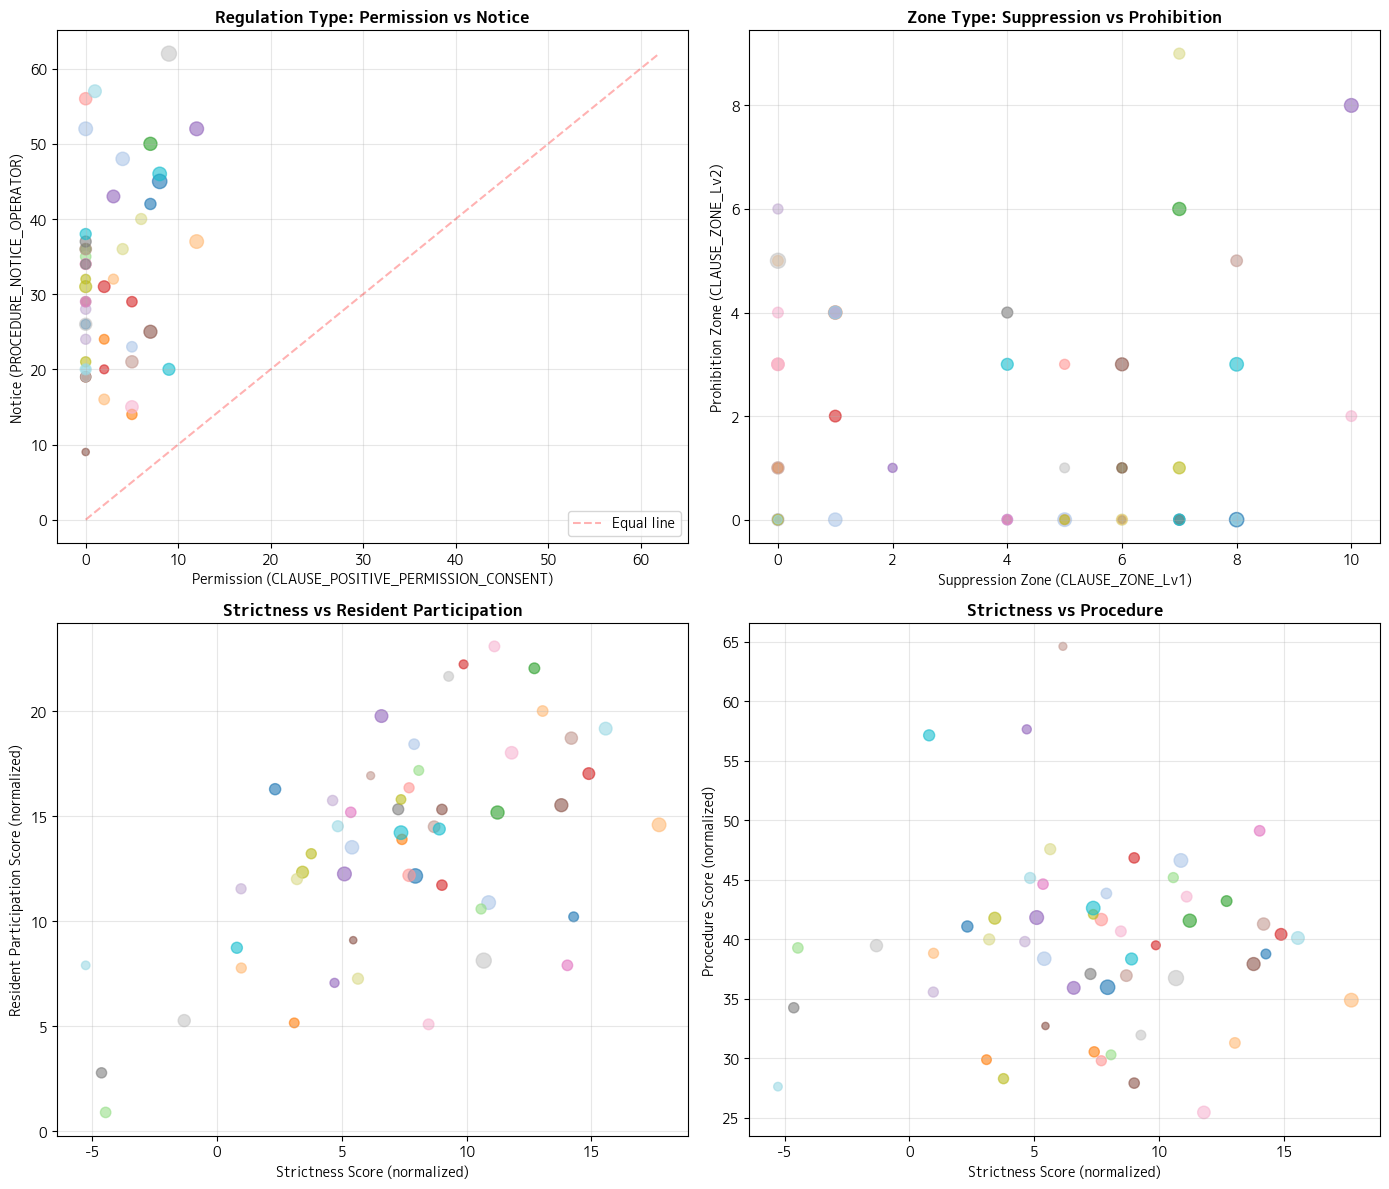

散布図を保存しました: solar_rule_v1.1_scatter.png


In [35]:
# 散布図: 許可 vs 届出
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. 許可 vs 届出
ax1 = axes[0, 0]
scatter1 = ax1.scatter(df_with_residuals['*CLAUSE_POSITIVE_PERMISSION_CONSENT'], 
                       df_with_residuals['*PROCEDURE_NOTICE_OPERATOR'],
                       s=df_with_residuals['ケース数']/2,
                       alpha=0.6, 
                       c=range(len(df_with_residuals)), 
                       cmap='tab20')
ax1.set_xlabel('Permission (CLAUSE_POSITIVE_PERMISSION_CONSENT)', fontsize=10)
ax1.set_ylabel('Notice (PROCEDURE_NOTICE_OPERATOR)', fontsize=10)
ax1.set_title('Regulation Type: Permission vs Notice', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
# 対角線を追加
max_val = max(df_with_residuals['*CLAUSE_POSITIVE_PERMISSION_CONSENT'].max(), 
              df_with_residuals['*PROCEDURE_NOTICE_OPERATOR'].max())
ax1.plot([0, max_val], [0, max_val], 'r--', alpha=0.3, label='Equal line')
ax1.legend()

# 2. 抑制区域 vs 禁止区域
ax2 = axes[0, 1]
scatter2 = ax2.scatter(df_with_residuals['*CLAUSE_ZONE_Lv1'], 
                       df_with_residuals['*CLAUSE_ZONE_Lv2'],
                       s=df_with_residuals['ケース数']/2,
                       alpha=0.6,
                       c=range(len(df_with_residuals)),
                       cmap='tab20')
ax2.set_xlabel('Suppression Zone (CLAUSE_ZONE_Lv1)', fontsize=10)
ax2.set_ylabel('Prohibition Zone (CLAUSE_ZONE_Lv2)', fontsize=10)
ax2.set_title('Zone Type: Suppression vs Prohibition', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. 厳格度スコア vs 住民参加スコア
ax3 = axes[1, 0]
scatter3 = ax3.scatter(df_with_residuals['厳格度スコア(正規化)'], 
                       df_with_residuals['住民参加スコア(正規化)'],
                       s=df_with_residuals['ケース数']/2,
                       alpha=0.6,
                       c=range(len(df_with_residuals)),
                       cmap='tab20')
ax3.set_xlabel('Strictness Score (normalized)', fontsize=10)
ax3.set_ylabel('Resident Participation Score (normalized)', fontsize=10)
ax3.set_title('Strictness vs Resident Participation', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. 厳格度スコア vs 手続きスコア
ax4 = axes[1, 1]
scatter4 = ax4.scatter(df_with_residuals['厳格度スコア(正規化)'], 
                       df_with_residuals['手続きスコア(正規化)'],
                       s=df_with_residuals['ケース数']/2,
                       alpha=0.6,
                       c=range(len(df_with_residuals)),
                       cmap='tab20')
ax4.set_xlabel('Strictness Score (normalized)', fontsize=10)
ax4.set_ylabel('Procedure Score (normalized)', fontsize=10)
ax4.set_title('Strictness vs Procedure', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/ubuntu/cur/isep/solar_rule_v1.1_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("散布図を保存しました: solar_rule_v1.1_scatter.png")

## 8. まとめと考察

### 分析結果の要約

本分析では、53自治体の太陽光発電規制条例を以下の4つの観点から分類しました:

1. **規制タイプ**: 許可制優位・届出制優位・混合型
2. **区域類型**: 禁止地区制・抑制地区制・2層構造・区域設定なし
3. **厳格度レベル**: 非常に厳格・厳格・標準・緩やか
4. **プロセス重視度**: 住民参加重視型・手続き重視型・住民参加・手続き重視型・標準型

### 主な発見

- **規制タイプ**: 届出制優位が31自治体と最多で、許可制優位は16自治体、混合型は6自治体
- **区域設定**: 抑制地区制(16)と禁止地区制(13)がほぼ同数。区域設定なしも8自治体存在
- **厳格度**: 38自治体が「非常に厳格」に分類され、全体的に規制強度が高い傾向
- **住民参加**: 40自治体が「住民参加・手続き重視型」に分類され、プロセス重視の傾向が強い

### 今後の展開

- **FIT事業計画認定情報との突合**: 各自治体の太陽光発電事業件数と条例の厳格度の関係を分析
- **時系列分析**: 条例制定前後での事業展開の変化を追跡
- **地理的分析**: 地域特性(地形・土地利用など)と条例内容の関連性を検討
- **コーディングルールの改善**: レポートで指摘された改善点(住民同意取得義務の追加など)を反映